In [11]:
# Setup: imports and data loading

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')

# Load dataset
df = pd.read_excel(r"C:\Users\vimal\OneDrive\Desktop\ATHIRA\POWER BI\marketing_dataset.xlsx", sheet_name='Sheet1')

df['Date'] = pd.to_datetime(df['Date'], unit='ms', errors='coerce')
df = df.sort_values('Date')

df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Location,Language,Customer_Segment,Date,Clicks,Impressions,Conversion_Rate,Campaign_Spend,Revenue,ROI,Conversions,Engagement_Score
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,Chicago,Spanish,Health & Wellness,2021-01-01,506,1922,0.04,16174,101734.46,6.29,20.24,6
145270,145271,DataTech Solutions,Display,Women 35-44,15 days,Email,Los Angeles,Spanish,Health & Wellness,2021-01-01,256,4394,0.06,7382,57358.14,7.77,15.36,2
198925,198926,Innovate Industries,Email,Men 18-24,60 days,YouTube,Houston,Mandarin,Foodies,2021-01-01,693,4559,0.10,15231,59705.52,3.92,69.30,9
18250,18251,Innovate Industries,Search,Men 18-24,45 days,Facebook,Houston,Spanish,Outdoor Adventurers,2021-01-01,178,6802,0.08,13034,37928.94,2.91,14.24,10
144905,144906,DataTech Solutions,Search,Women 25-34,60 days,Google Ads,Chicago,English,Health & Wellness,2021-01-01,713,8842,0.02,7126,29857.94,4.19,14.26,2


In [12]:
# KPIs and averages

total_spend = df['Campaign_Spend'].sum()
total_revenue = df['Revenue'].sum()
total_conversions = df['Conversions'].sum()

overall_roi = (total_revenue - total_spend) / total_spend if total_spend != 0 else 0


avg_roi = df['ROI'].mean()
avg_conv_rate = df['Conversion_Rate'].mean()

print('Total Spend:', round(total_spend, 2))
print('Total Revenue:', round(total_revenue, 2))
print('Total Conversions:', round(total_conversions, 2))
print('Overall ROI:', round(overall_roi, 4))

print('Average ROI:', round(avg_roi, 4))
print('Average Conversion Rate:', round(avg_conv_rate, 4))

Total Spend: 2500878608
Total Revenue: 12517388674.24
Total Conversions: 8804579.69
Overall ROI: 4.0052
Average ROI: 5.0024
Average Conversion Rate: 0.0801


In [25]:
##Trend Section##
# Trends aggregates
trends = df.groupby('Date').agg(
    Spend=('Campaign_Spend', 'sum'),
    Revenue=('Revenue', 'sum'),
    Conversions=('Conversions', 'sum')
).reset_index()

trends['ROI'] = (trends['Revenue'] - trends['Spend']) / trends['Spend']

In [19]:
df['Month_Period'] = df['Date'].dt.to_period('M').dt.to_timestamp()

In [20]:
# Trends aggregates
trends = df.groupby('Month_Period').agg(
    Spend=('Campaign_Spend', 'sum'),
    Revenue=('Revenue', 'sum'),
    Conversions=('Conversions', 'sum')
).reset_index()

trends['ROI'] = (trends['Revenue'] - trends['Spend']) / trends['Spend']

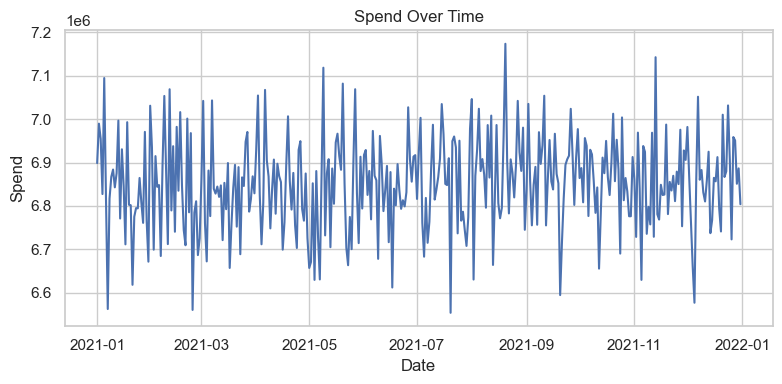

In [26]:
# Line chart: Spend over time 

# Spend over time
plt.figure(figsize=(8, 4))
sns.lineplot(data=trends, x='Date', y='Spend')
plt.title('Spend Over Time')
plt.tight_layout()
plt.show()

In [ ]:
df['Month_Period'] = df['Date'].dt.to_period('M').dt.to_timestamp()

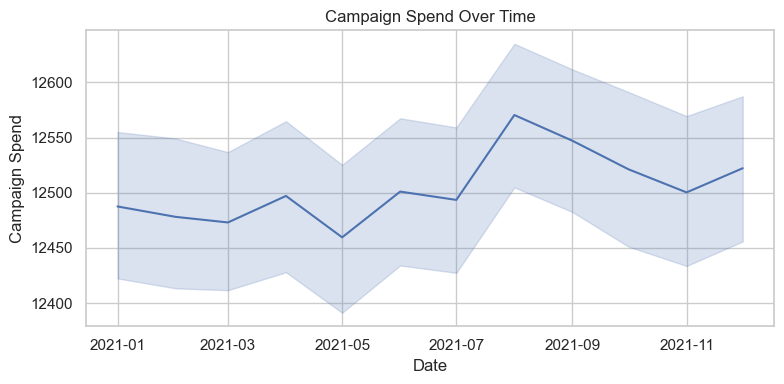

In [21]:
##Campaign Performance##
plt.figure(figsize=(8,4))
sns.lineplot(x='Month_Period', y='Campaign_Spend', data=df)
plt.xlabel('Date')
plt.ylabel('Campaign Spend')
plt.title('Campaign Spend Over Time')
plt.tight_layout()
plt.show()


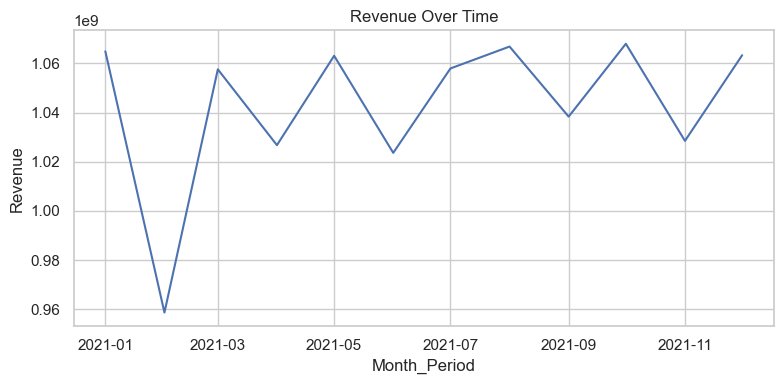

In [22]:
# Revenue over time
plt.figure(figsize=(8, 4))
sns.lineplot(data=trends, x='Month_Period', y='Revenue')
plt.title('Revenue Over Time')
plt.tight_layout()
plt.show()

In [24]:
##Channel/Campaign section##
# Channel and Campaign aggregates

channel_agg = df.groupby('Channel_Used').agg(
    Spend=('Campaign_Spend', 'sum'),
    Revenue=('Revenue', 'sum'),
    Conversions=('Conversions', 'sum'),
    ROI=('ROI', 'mean'),
    Conversion_Rate=('Conversion_Rate', 'mean')
).reset_index()

campaign_agg = df.groupby('Campaign_Type').agg(
    Spend=('Campaign_Spend', 'sum'),
    Revenue=('Revenue', 'sum'),
    Conversions=('Conversions', 'sum'),
    ROI=('ROI', 'mean'),
    Conversion_Rate=('Conversion_Rate', 'mean')
).reset_index()

channel_agg

,Channel_Used,Spend,Revenue,Conversions,ROI,Conversion_Rate
0,Email,420874104,2.103770e+09,1485393.65,4.996487,0.080282
1,Facebook,410595258,2.063945e+09,1446290.30,5.018699,0.079992
2,Google Ads,418912314,2.097811e+09,1468753.09,5.003141,0.080183
3,Instagram,417124850,2.079977e+09,1462864.48,4.988706,0.079886
4,Website,416593500,2.087559e+09,1477710.16,5.014167,0.080183
5,YouTube,416778582,2.084326e+09,1463568.01,4.993754,0.079889


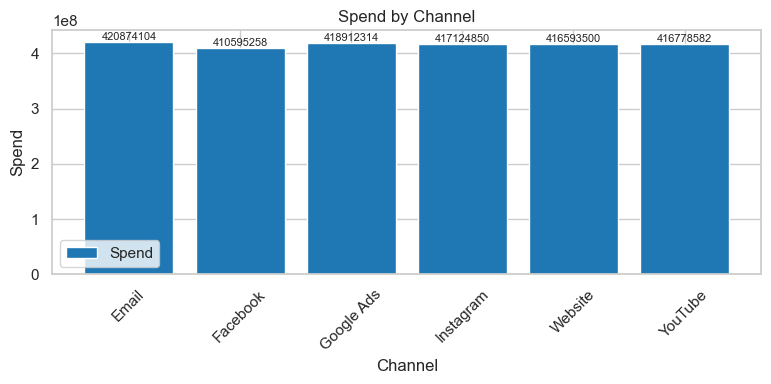

In [25]:
# Column chart: Spend by Channel

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(channel_agg['Channel_Used'], channel_agg['Spend'], color='tab:blue', label='Spend')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, str(round(height, 0)),
            ha='center', va='bottom', fontsize=8)

ax.set_title('Spend by Channel')
ax.set_xlabel('Channel')
ax.set_ylabel('Spend')
ax.legend()
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

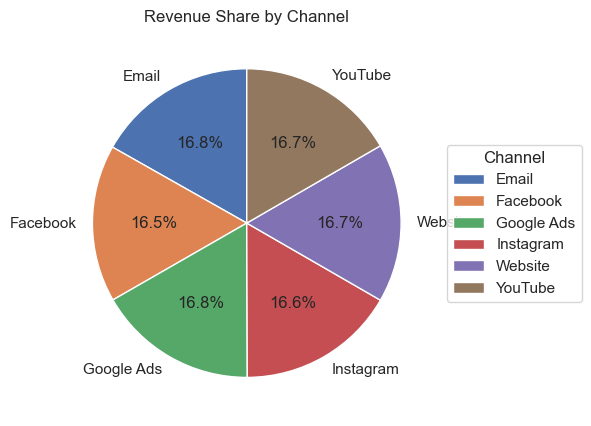

In [26]:
# Pie chart: Revenue share by Channel

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(
    channel_agg['Revenue'],
    labels=channel_agg['Channel_Used'],
    autopct='%1.1f%%',
    startangle=90
)
ax.set_title('Revenue Share by Channel')
ax.legend(channel_agg['Channel_Used'], title='Channel', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

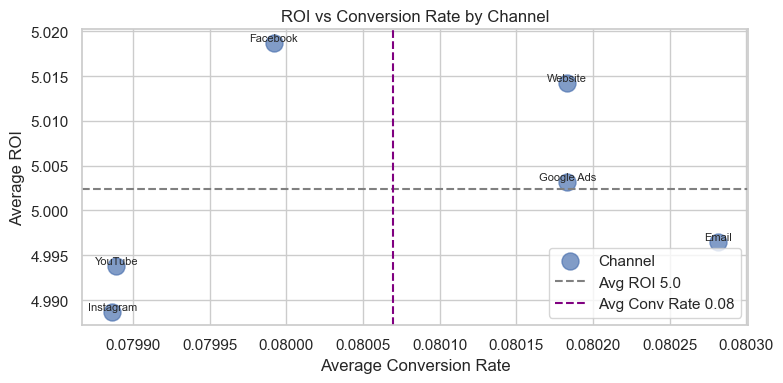

In [27]:
# Scatter plot: ROI vs Conversion Rate by Channel

fig, ax = plt.subplots(figsize=(8, 4))

scatter = ax.scatter(
    channel_agg['Conversion_Rate'],
    channel_agg['ROI'],
    s=150,
    alpha=0.7,
    label='Channel'
)

for i, row in channel_agg.iterrows():
    ax.text(row['Conversion_Rate'], row['ROI'], row['Channel_Used'],
            ha='center', va='bottom', fontsize=8)

ax.axhline(avg_roi, color='gray', linestyle='--', label='Avg ROI ' + str(round(avg_roi, 2)))
ax.axvline(avg_conv_rate, color='purple', linestyle='--', label='Avg Conv Rate ' + str(round(avg_conv_rate, 2)))

ax.set_title('ROI vs Conversion Rate by Channel')
ax.set_xlabel('Average Conversion Rate')
ax.set_ylabel('Average ROI')
ax.legend()

plt.tight_layout()
plt.show()

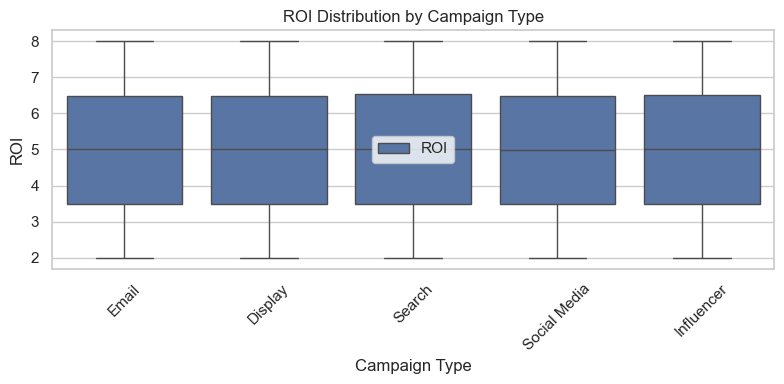

In [28]:
# Box plot: ROI distribution by Campaign Type

fig, ax = plt.subplots(figsize=(8, 4))
sns.boxplot(data=df, x='Campaign_Type', y='ROI', ax=ax)
ax.set_title('ROI Distribution by Campaign Type')
ax.set_xlabel('Campaign Type')
ax.set_ylabel('ROI')
ax.legend(['ROI'])  # simple legend label

ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [29]:
##Distribution Section##
# Aggregations for distribution views

region_agg = df.groupby('Location').agg(
    Spend=('Campaign_Spend', 'sum'),
    Revenue=('Revenue', 'sum'),
    ROI=('ROI', 'mean')
).reset_index()

pivot_spend_channel_region = df.pivot_table(
    index='Location',
    columns='Channel_Used',
    values='Campaign_Spend',
    aggfunc='sum',
    fill_value=0
)

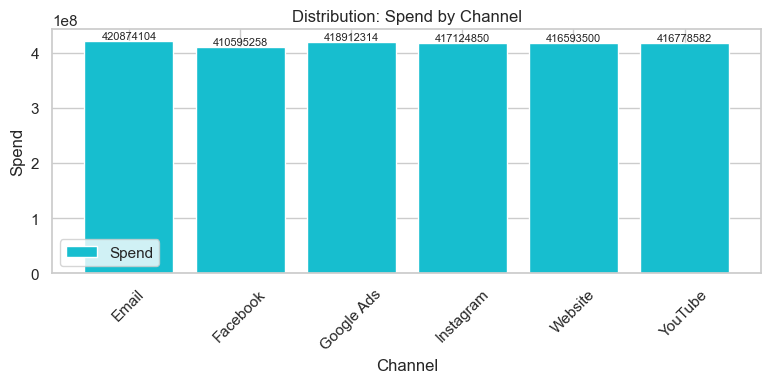

In [30]:
# Column chart: Distribution of Spend by Channel (same metric, different context)

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(channel_agg['Channel_Used'], channel_agg['Spend'], color='tab:cyan', label='Spend')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, str(round(height, 0)),
            ha='center', va='bottom', fontsize=8)

ax.set_title('Distribution: Spend by Channel')
ax.set_xlabel('Channel')
ax.set_ylabel('Spend')
ax.legend()
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

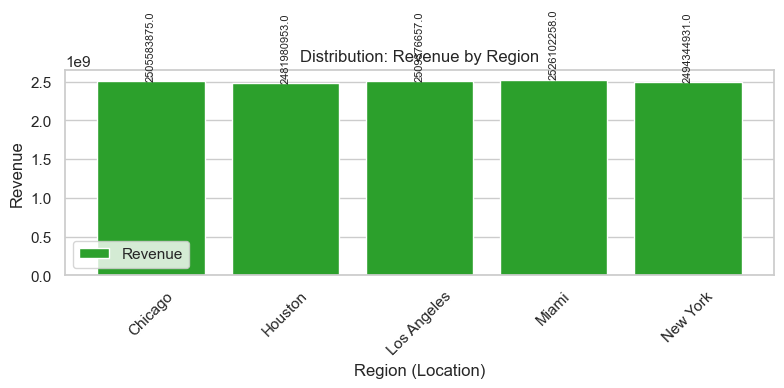

In [31]:
# Column chart: Revenue by Region (Location)

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(region_agg['Location'], region_agg['Revenue'], color='tab:green', label='Revenue')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, str(round(height, 0)),
            ha='center', va='bottom', fontsize=8, rotation=90)

ax.set_title('Distribution: Revenue by Region')
ax.set_xlabel('Region (Location)')
ax.set_ylabel('Revenue')
ax.legend()
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

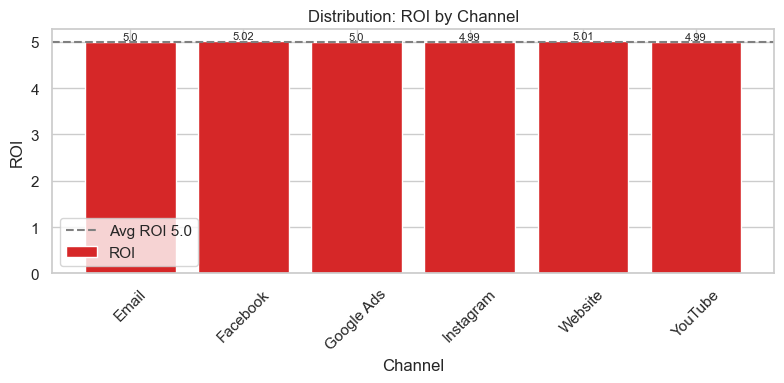

In [32]:
# Column chart: ROI by Channel

fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(channel_agg['Channel_Used'], channel_agg['ROI'], color='tab:red', label='ROI')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, str(round(height, 2)),
            ha='center', va='bottom', fontsize=8)

ax.axhline(avg_roi, color='gray', linestyle='--', label='Avg ROI ' + str(round(avg_roi, 2)))

ax.set_title('Distribution: ROI by Channel')
ax.set_xlabel('Channel')
ax.set_ylabel('ROI')
ax.legend()
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

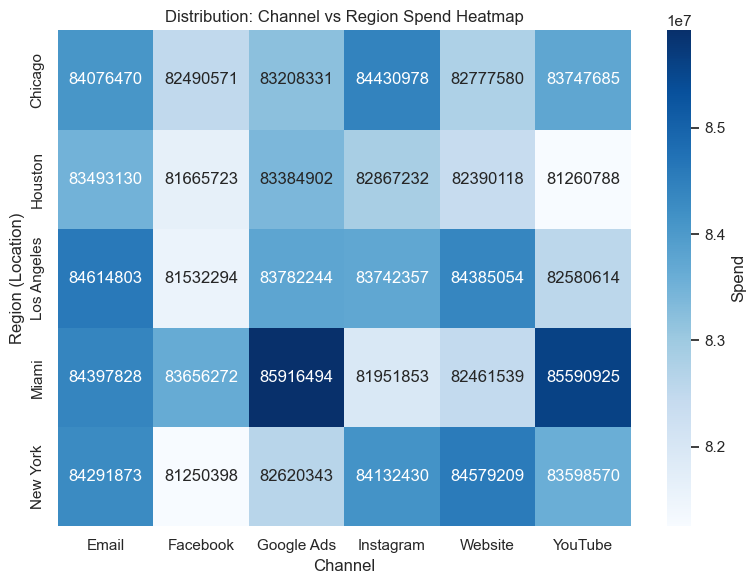

In [33]:
# Heatmap: Channel vs Region Spend

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    pivot_spend_channel_region,
    cmap='Blues',
    annot=True,
    fmt='.0f',
    cbar_kws={'label': 'Spend'},
    ax=ax
)

ax.set_title('Distribution: Channel vs Region Spend Heatmap')
ax.set_xlabel('Channel')
ax.set_ylabel('Region (Location)')
# Legend is the colorbar in this case

plt.tight_layout()
plt.show()